# Unsupervised Learning, Dimensionality Reduction

## Dimensionality Reduction with PCA (Taxi Data)

### Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Data Preperation

In [2]:
n = 100
x = np.linspace(10,100,n)
e = np.random.normal(0, 30, x.shape[0])
y = 3 * x + e

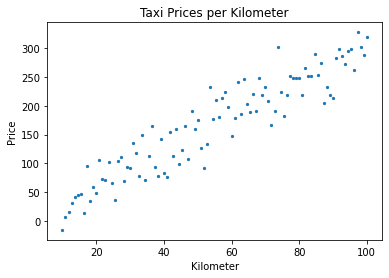

In [3]:
# make the plot
plt.scatter(x,y, s=5)
# axis naming
plt.title('Taxi Prices per Kilometer')
plt.ylabel('Price')
plt.xlabel('Kilometer')
plt.show()

### Preprocessing

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(np.vstack((x,y)).T)

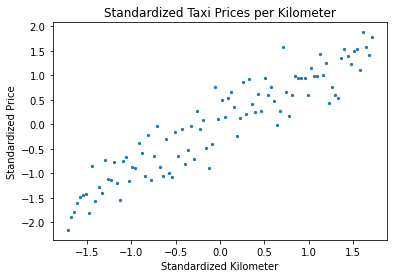

In [5]:
# make the plot
plt.scatter(X_scaled[:,0],X_scaled[:,1], s=5)
# axis naming
plt.title('Standardized Taxi Prices per Kilometer')
plt.ylabel('Standardized Price')
plt.xlabel('Standardized Kilometer')
plt.show()


### Fitting

In [6]:
taxi_pca = PCA(n_components=2, whiten=True)
taxi_pca.fit(X_scaled)

PCA(n_components=2, whiten=True)

### Interpretation of Projection Planes

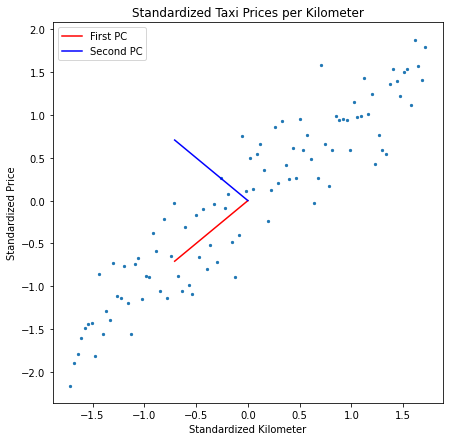

In [7]:
# make the plot
plt.figure(figsize=(7,7))
plt.scatter(X_scaled[:,0],X_scaled[:,1], s=5)
plt.plot([0,taxi_pca.components_[0][0]],[0,taxi_pca.components_[0][1]], c='red', label='First PC')
plt.plot([0,taxi_pca.components_[1][0]],[0,taxi_pca.components_[1][1]], c='blue', label='Second PC')
# axis naming
plt.title('Standardized Taxi Prices per Kilometer')
plt.ylabel('Standardized Price')
plt.xlabel('Standardized Kilometer')
plt.legend(loc=0)
plt.show()

## MNIST Dataset

- The MNIST database are handwritten digits 
- Has a training set of 60,000 examples, and a test set of 10,000 examples
- The images contain grey levels
- The images were centered in a 28x28

### Packages

In [8]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

### Load Data

In [9]:
# loading MNIST Data, seperating in Training and Testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

(60000, 28, 28)


### Plotting Data

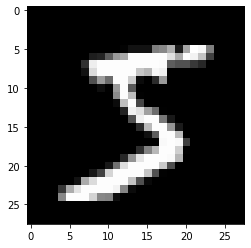

This picture is labelled as number:  5


In [10]:
# Plot the first image from the training data
plt.imshow(X_train[0], cmap='gray')
plt.show()
# Check if the number is correctly labled
print('This picture is labelled as number: ', y_train[0])

## Dimensionality Reduction with PCA (MNIST Data all)

- Perform PCA on the entire MNIST Dataset
- Extract low dimensional features of two different numbers
- Compare them in a scatter plot

### Packages

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

### Load Data

In [12]:
# loading MNIST Data, seperating in Training and Testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

(60000, 28, 28)


### Preprocessing

In [13]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fitting

In [14]:
mnist_pca = PCA(n_components=150, whiten=True)
mnist_pca.fit(X_train_scaled)

PCA(n_components=150, whiten=True)

### Interpretation of Projection Planes

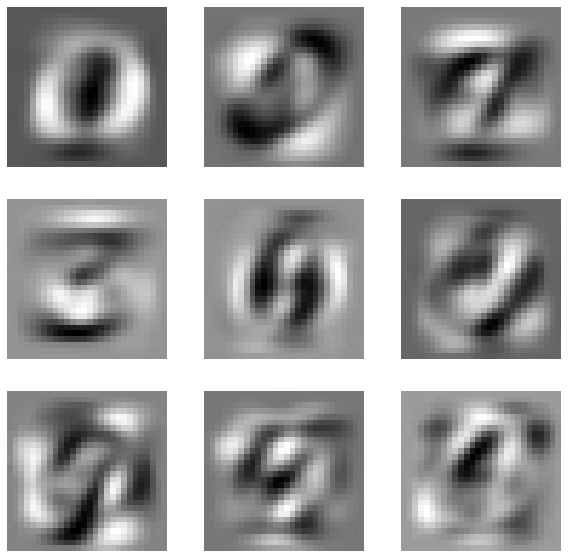

In [15]:
nrow = 3
ncol = 3
fig, _axs = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_figheight(10)
fig.set_figwidth(10)
axs = _axs.flatten()
for i in range(nrow * ncol):
    plot = axs[i].imshow(mnist_pca.components_[i].reshape(28,28), cmap='gray')
    axs[i].axis('off')

### PCA as Preprocessing

- Extract the first two Principal Components of two defined numbers and visualize them in a scatter plot
- Do the first two principal components seperating the classes?

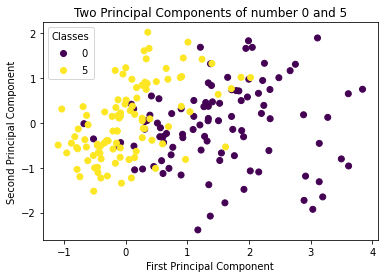

In [16]:
#### Play-Zone ####
# Numbers between 0 and 9
first_number = 0
second_number = 5
#### Play-Zone ####

index_first = np.where(y_test == first_number)[0][:100]
X_test_reduced = X_test_scaled[index_first,:]
y_test_reduced = np.ones(index_first.shape[0], dtype=np.int32) * first_number
index_second = np.where(y_test == second_number)[0][:100]
X_test_reduced = np.vstack((X_test_reduced, X_test_scaled[index_second,:]))
y_test_reduced = np.hstack((y_test_reduced,np.ones(index_second.shape[0], dtype=np.int32) * second_number))

principal_components = mnist_pca.transform(X_test_reduced)
scatter = plt.scatter(principal_components[:,0], 
            principal_components[:,1], 
            c=y_test_reduced)
plt.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
plt.title('Two Principal Components of number {} and {}'.format(first_number, second_number))
plt.ylabel('Second Principal Component')
plt.xlabel('First Principal Component')
plt.show()

## Dimensionality Reduction with PCA (MNIST Data only one number)

- Perform PCA only on one number

### Packages

In [17]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

### Load Data Subset of the Data

In [18]:
# loading MNIST Data, seperating in Training and Testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

(60000, 28, 28)


In [19]:
#### Play-Zone ####
# Numbers between 0 and 9
number = 5
#### Play-Zone ####

index = np.where(y_train == number)[0]
X_train_reduced = X_train[index,:]
y_test_reduced = np.ones(index.shape[0], dtype=np.int32) * number

In [20]:
X_train_reduced.shape

(5421, 28, 28)

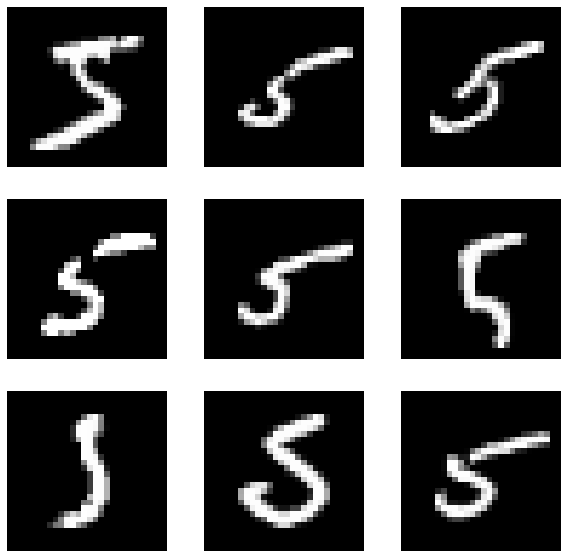

In [21]:
nrow = 3
ncol = 3
fig, _axs = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_figheight(10)
fig.set_figwidth(10)
axs = _axs.flatten()
for i in range(nrow * ncol):
    plot = axs[i].imshow(X_train_reduced[i].reshape(28,28), cmap='gray')
    axs[i].axis('off')

### Preprocessing

In [22]:
X_train_reduced = X_train_reduced.reshape(index.shape[0],28*28)

scaler = StandardScaler()
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)

### Fitting

In [23]:
mnist_pca = PCA(n_components=150, whiten=True)
mnist_pca.fit(X_train_reduced_scaled)

PCA(n_components=150, whiten=True)

### Interpretation of Projection Planes

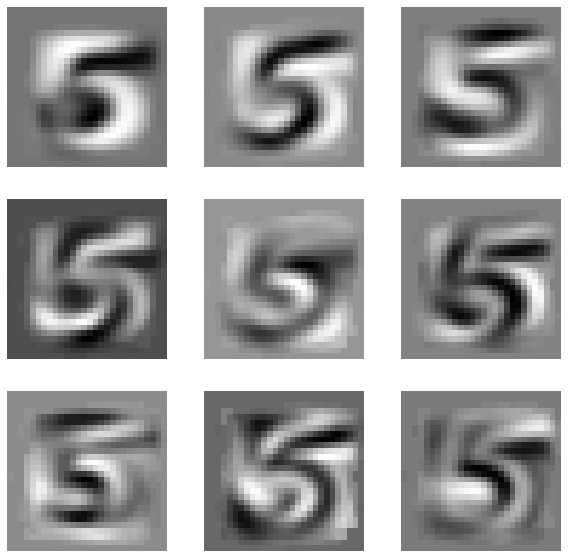

In [24]:
nrow = 3
ncol = 3
fig, _axs = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_figheight(10)
fig.set_figwidth(10)
axs = _axs.flatten()
for i in range(nrow * ncol):
    plot = axs[i].imshow(mnist_pca.components_[i].reshape(28,28), cmap='gray')
    axs[i].axis('off')

## Faces Dataset

- The Olivetti faces dataset contains a set of face images taken between April 1992 and April 1994 at AT&T Laboratories Cambridge
- There are ten different images of each of 40 distinct subjects 
- For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses) 
- All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).
- Has a training set of 300 examples, and a test set of 100 examples
- The images contain grey levels
- The images were centered in a 64x64

### Packages

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

### Load Data

In [26]:
faces = datasets.fetch_olivetti_faces()

### Plotting Data

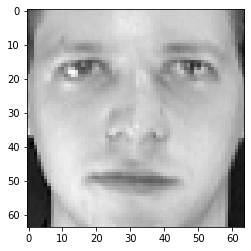

In [27]:
plt.imshow(faces.data[0].reshape(64,64), cmap='gray')

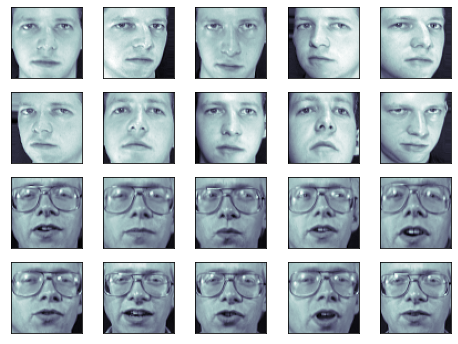

In [28]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

## Dimensionality Reduction with PCA (Faces Data)

### Packages

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Preprocessing

In [30]:
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fitting

In [32]:
faces_pca = PCA(n_components=150, whiten=True)
faces_pca.fit(X_train)

PCA(n_components=150, whiten=True)

### Interpretation of Projection Planes

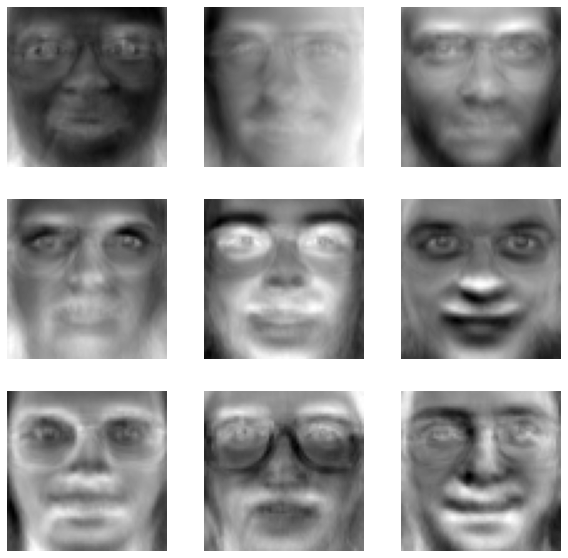

In [33]:
nrow = 3
ncol = 3
fig, _axs = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_figheight(10)
fig.set_figwidth(10)
axs = _axs.flatten()
for i in range(nrow * ncol):
    plot = axs[i].imshow(faces_pca.components_[i].reshape(64,64), cmap='gray')
    axs[i].axis('off')
plt.show()